In [1]:
import pickle
import numpy as np
import krotov

import interaction_constants
from qubit_system.geometry.regular_lattice_1d import RegularLattice1D
from qubit_system.qubit_system_classes import EvolvingQubitSystem
from qubit_system.utils.ghz_states import StandardGHZState
from qubit_system.utils.interpolation import get_hamiltonian_coeff_linear_interpolation, \
    get_hamiltonian_coeff_interpolation

# Investigating $T_{\textrm{min}}$
## Evaluating how robust optimal control methods are

In [3]:
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family="serif", serif="CMU Serif")
plt.rc('text.latex', preamble=r'\usepackage{upgreek}')

In [2]:
N_RYD = 50
C6 = interaction_constants.get_C6(N_RYD)

LATTICE_SPACING = 1.5e-6

print(f"C6: {C6:.3e}")
characteristic_V = C6 / (LATTICE_SPACING ** 6)
print(f"Characteristic V: {characteristic_V:.3e} Hz")

norm_V = C6 / (LATTICE_SPACING ** 6) / characteristic_V


C6: 1.555e-26
Characteristic V: 1.365e+09 Hz


In [3]:
from demonstration_utils import *

Solved in 0.14s
fidelity with GHZ: 0.7489 (with antisymmetric: 0.1152)
superposition probability: 0.8641 (g: 0.4653, e: 0.3988)



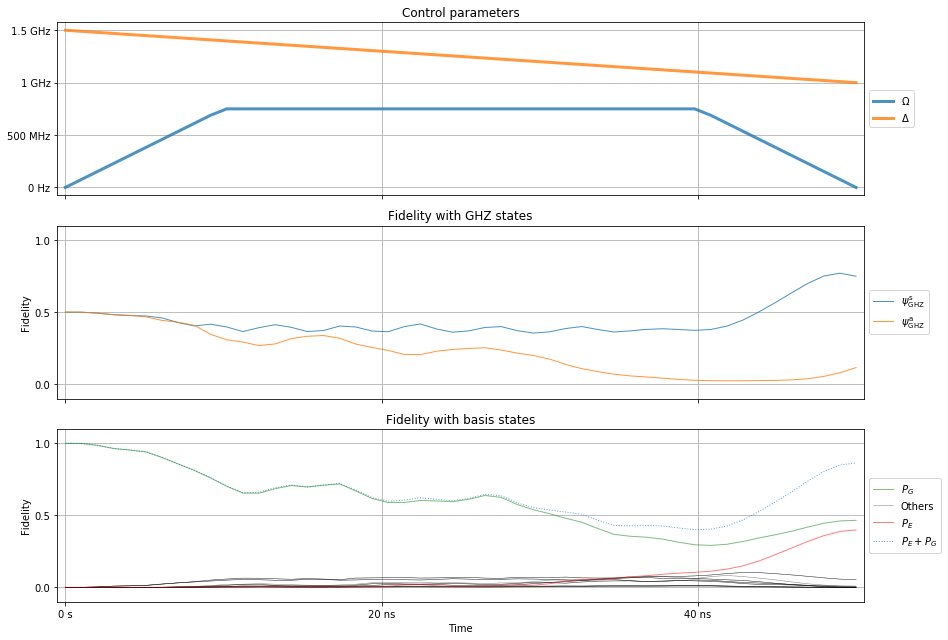

In [4]:
N = 4
t = 0.05e-6
e_qs = EvolvingQubitSystem(
    N=N, V=C6, geometry=RegularLattice1D(spacing=LATTICE_SPACING),
    Omega=get_hamiltonian_coeff_linear_interpolation([0, t / 5, t * 4 / 5, t], [0, 750e6, 750e6, 0]),
    Delta=get_hamiltonian_coeff_linear_interpolation([0, t], [1.5e9, 1e9]),
    t_list=np.linspace(0, t, 50),
    ghz_state=StandardGHZState(N)
)
solve_and_print_stats(e_qs)


------------------------------------
---- Control optimisation stats ----
**** Timings (HH:MM:SS.US) ****
Total wall time elapsed during optimisation: 0:00:41.301661
Wall time computing Hamiltonians: 0:00:00.918104 (2.22%)
Wall time computing propagators: 0:00:35.535914 (86.04%)
Wall time computing forward propagation: 0:00:00.170372 (0.41%)
Wall time computing onward propagation: 0:00:00.128003 (0.31%)
Wall time computing gradient: 0:00:00 (0.00%)

**** Iterations and function calls ****
Number of iterations: 9999
Number of fidelity function calls: 11396
Number of times fidelity is computed: 11397
Number of gradient function calls: 0
Number of times gradients are computed: 0
Number of times timeslot evolution is recomputed: 11397

**** Control amplitudes ****
Number of control amplitude updates: 11396
Mean number of updates per iteration: 1.1397139713971398
Number of timeslot values changed: 91167
Mean number of timeslot changes per update: 7.99991224991225
Number of amplitude values

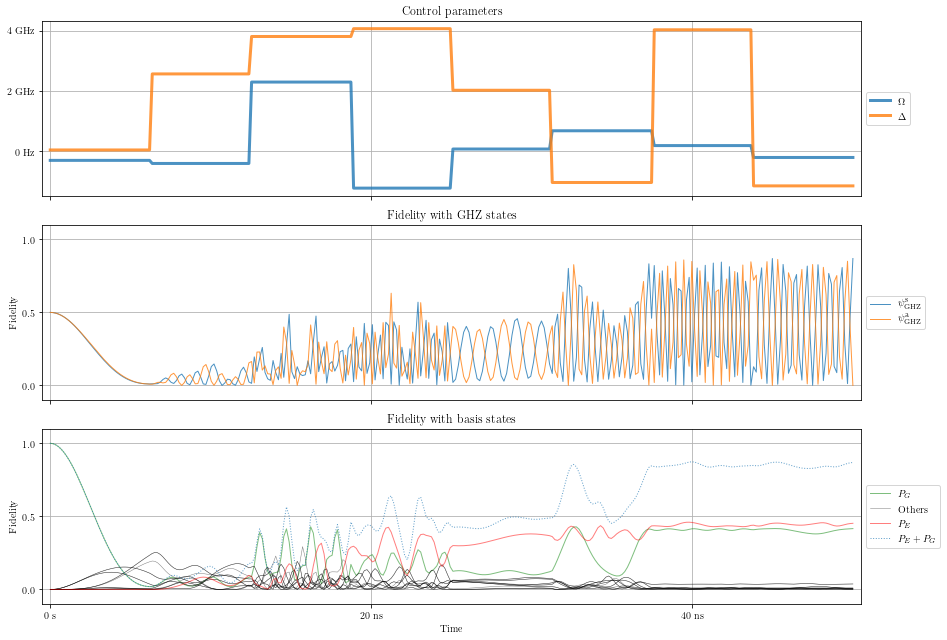

In [5]:
N = 4
t = 0.05e-6
norm_t = t * characteristic_V
optim_result = get_optimised_controls(N, n_ts=8, norm_t=norm_t, norm_V=norm_V, alg="CRAB")
report_stats(optim_result, N)
plot_optimresult(optim_result, N, t, C6, characteristic_V, geometry=RegularLattice1D(LATTICE_SPACING))


------------------------------------
---- Control optimisation stats ----
**** Timings (HH:MM:SS.US) ****
Total wall time elapsed during optimisation: 0:00:00.297587
Wall time computing Hamiltonians: 0:00:00.015450 (5.19%)
Wall time computing propagators: 0:00:00.222317 (74.71%)
Wall time computing forward propagation: 0:00:00.002553 (0.86%)
Wall time computing onward propagation: 0:00:00.002055 (0.69%)
Wall time computing gradient: 0:00:00.018795 (6.32%)

**** Iterations and function calls ****
Number of iterations: 118
Number of fidelity function calls: 134
Number of times fidelity is computed: 134
Number of gradient function calls: 134
Number of times gradients are computed: 134
Number of times timeslot evolution is recomputed: 134

**** Control amplitudes ****
Number of control amplitude updates: 133
Mean number of updates per iteration: 1.1271186440677967
Number of timeslot values changed: 1064
Mean number of timeslot changes per update: 8.0
Number of amplitude values changed: 20

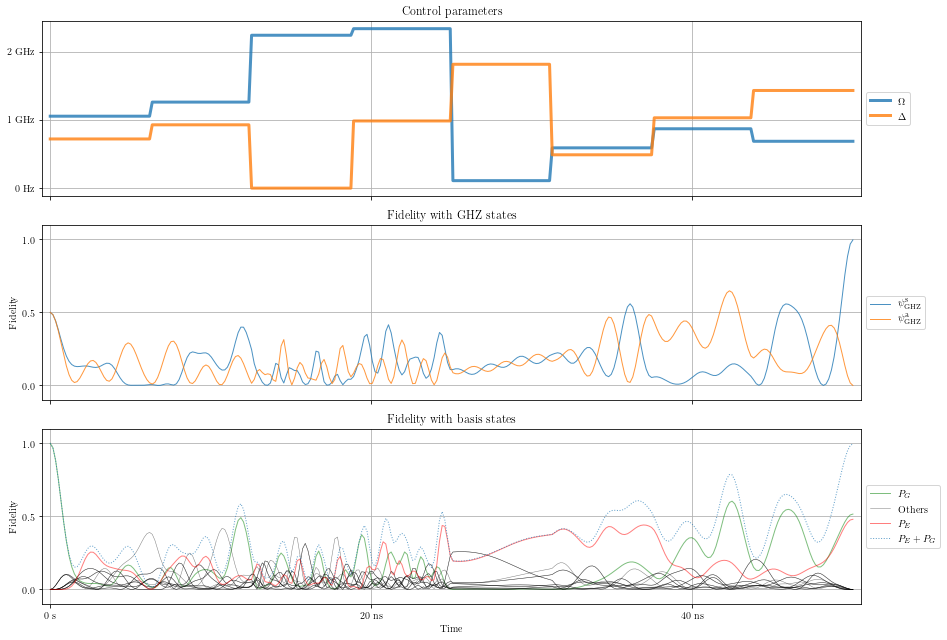

In [41]:
N = 4
t = 0.05e-6
norm_t = t * characteristic_V
optim_result = get_optimised_controls(N, n_ts=8, norm_t=norm_t, norm_V=norm_V)
report_stats(optim_result, N)
plot_optimresult(optim_result, N, t, C6, characteristic_V, geometry=RegularLattice1D(LATTICE_SPACING))

timesteps: 8
Solved in 0.24s
fidelity with GHZ: 0.9453 (with antisymmetric: 0.0116)
superposition probability: 0.9569 (g: 0.5570, e: 0.3999)



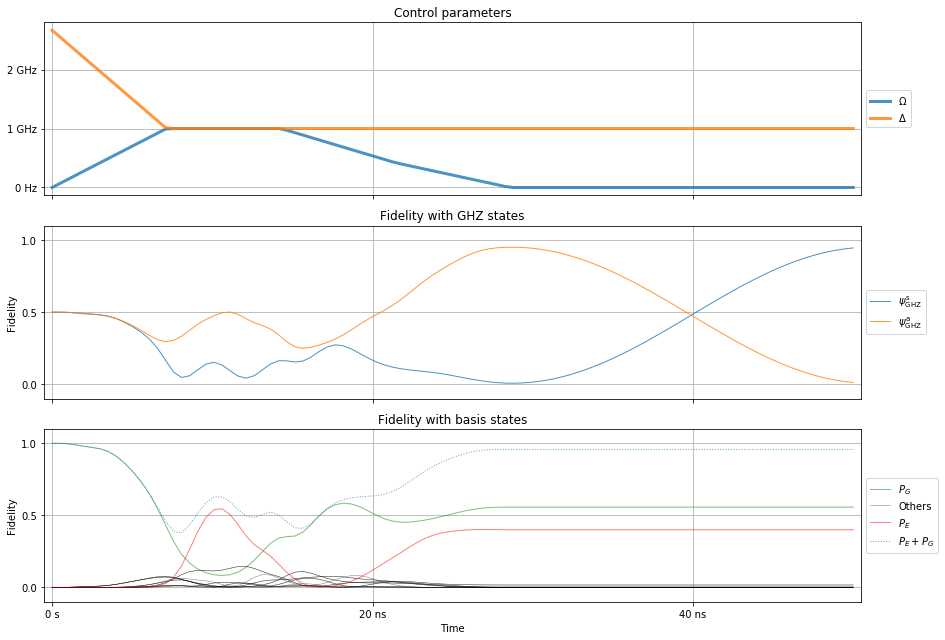

In [5]:
with open("reinforcement_learning/results/20190821_135329.pkl", "rb") as f:
    data = pickle.load(f)
assert data['evolving_qubit_system_kwargs']['N'] == 4
assert data['evolving_qubit_system_kwargs']['t_list'][-1] == 0.05e-6
t_list = data['evolving_qubit_system_kwargs']['t_list']
print(f'timesteps: {len(t_list)}')
solve_t_list = np.linspace(t_list[0], t_list[-1], 100)

data['evolving_qubit_system_kwargs'].pop('t_list')
e_qs = EvolvingQubitSystem(
    **data['evolving_qubit_system_kwargs'],
    Omega=get_hamiltonian_coeff_linear_interpolation(
        t_list,
        data['protocol'].Omega,
    ),
    Delta=get_hamiltonian_coeff_linear_interpolation(
        t_list,
        data['protocol'].Delta,
    ),
    t_list=solve_t_list,
)
solve_and_print_stats(e_qs)


## 8 qubits, $T = 0.5 \times 10^{-6}$s

Solved in 1.26s
fidelity with GHZ: 0.0008 (with antisymmetric: 0.9903)
superposition probability: 0.9911 (g: 0.4758, e: 0.5154)



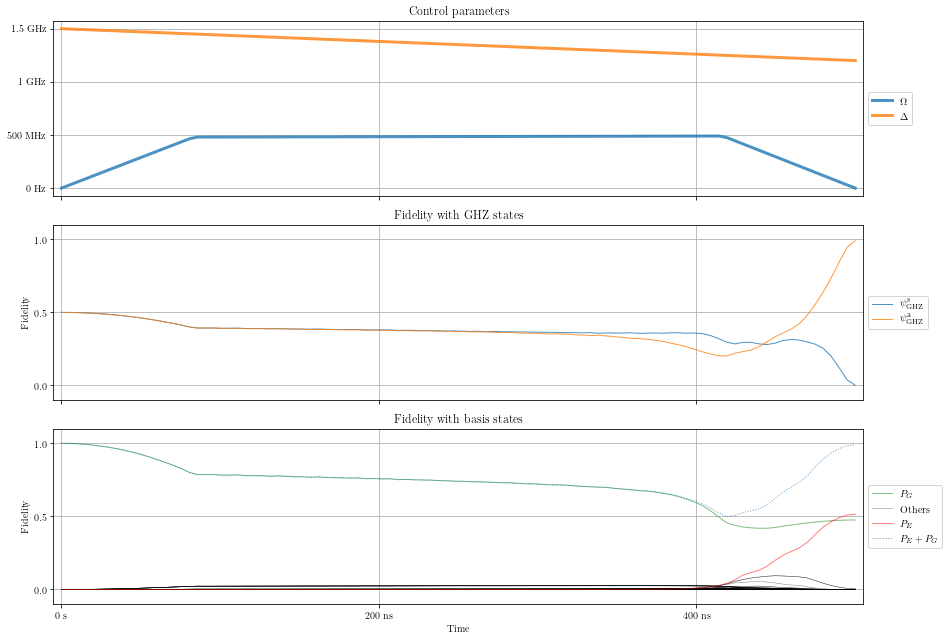

In [42]:
N = 8
t = 0.5e-6
e_qs = EvolvingQubitSystem(
    N=N, V=C6, geometry=RegularLattice1D(spacing=LATTICE_SPACING),
    Omega=get_hamiltonian_coeff_linear_interpolation([0, t / 6, t * 5 / 6, t], [0, 480e6, 490e6, 0]),
    Delta=get_hamiltonian_coeff_linear_interpolation([0, t], [1.5e9, 1.2e9]),
    t_list=np.linspace(0, t, 100),
    ghz_state=StandardGHZState(N)
)
solve_and_print_stats(e_qs)

### GRAPE



------------------------------------
---- Control optimisation stats ----
**** Timings (HH:MM:SS.US) ****
Total wall time elapsed during optimisation: 0:01:41.572054
Wall time computing Hamiltonians: 0:00:09.329731 (9.19%)
Wall time computing propagators: 0:01:31.512566 (90.10%)
Wall time computing forward propagation: 0:00:00.144947 (0.14%)
Wall time computing onward propagation: 0:00:00.154774 (0.15%)
Wall time computing gradient: 0:00:00.355625 (0.35%)

**** Iterations and function calls ****
Number of iterations: 178
Number of fidelity function calls: 195
Number of times fidelity is computed: 195
Number of gradient function calls: 195
Number of times gradients are computed: 195
Number of times timeslot evolution is recomputed: 195

**** Control amplitudes ****
Number of control amplitude updates: 194
Mean number of updates per iteration: 1.0898876404494382
Number of timeslot values changed: 2893
Mean number of timeslot changes per update: 14.912371134020619
Number of amplitude val

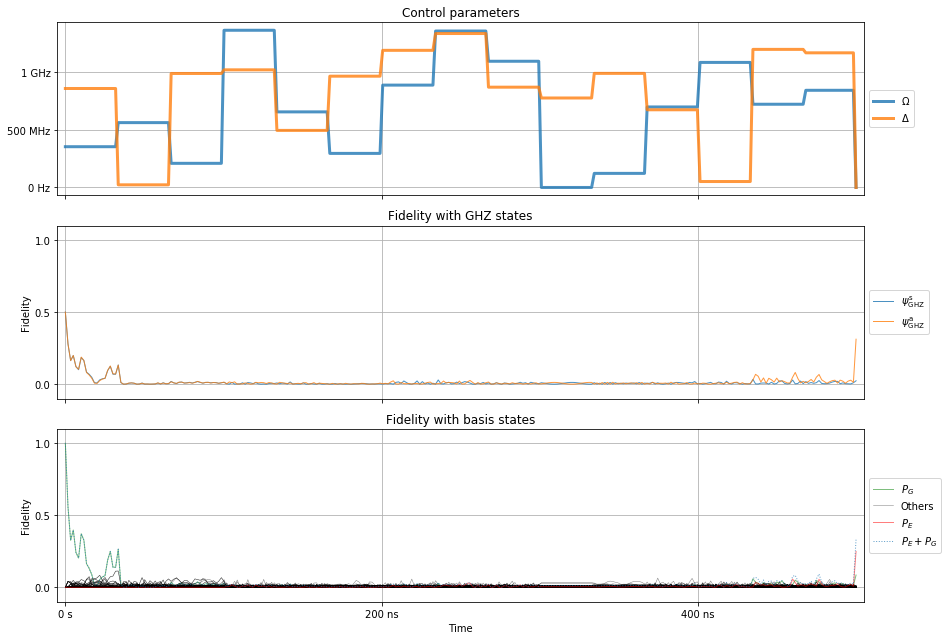

In [8]:
N = 8
t = 0.5e-6
norm_t = t * characteristic_V
optim_result = get_optimised_controls(N, n_ts=15, norm_t=norm_t, norm_V=norm_V, target_state_symmetric=False, 
                                      optim_kwargs={'init_pulse_type': "RND", 'max_wall_time': 300, 'amp_ubound': 1})
report_stats(optim_result, N, target_state_symmetric=False)
plot_optimresult(optim_result, N, t, C6, characteristic_V, geometry=RegularLattice1D(LATTICE_SPACING))


### CRAB



------------------------------------
---- Control optimisation stats ----
**** Timings (HH:MM:SS.US) ****
Total wall time elapsed during optimisation: 0:02:01.528234
Wall time computing Hamiltonians: 0:00:06.615792 (5.44%)
Wall time computing propagators: 0:01:54.612598 (94.31%)
Wall time computing forward propagation: 0:00:00.100442 (0.08%)
Wall time computing onward propagation: 0:00:00.114697 (0.09%)
Wall time computing gradient: 0:00:00 (0.00%)

**** Iterations and function calls ****
Number of iterations: 10
Number of fidelity function calls: 134
Number of times fidelity is computed: 134
Number of gradient function calls: 0
Number of times gradients are computed: 0
Number of times timeslot evolution is recomputed: 134

**** Control amplitudes ****
Number of control amplitude updates: 133
Mean number of updates per iteration: 13.3
Number of timeslot values changed: 1984
Mean number of timeslot changes per update: 14.917293233082706
Number of amplitude values changed: 2764
Mean num

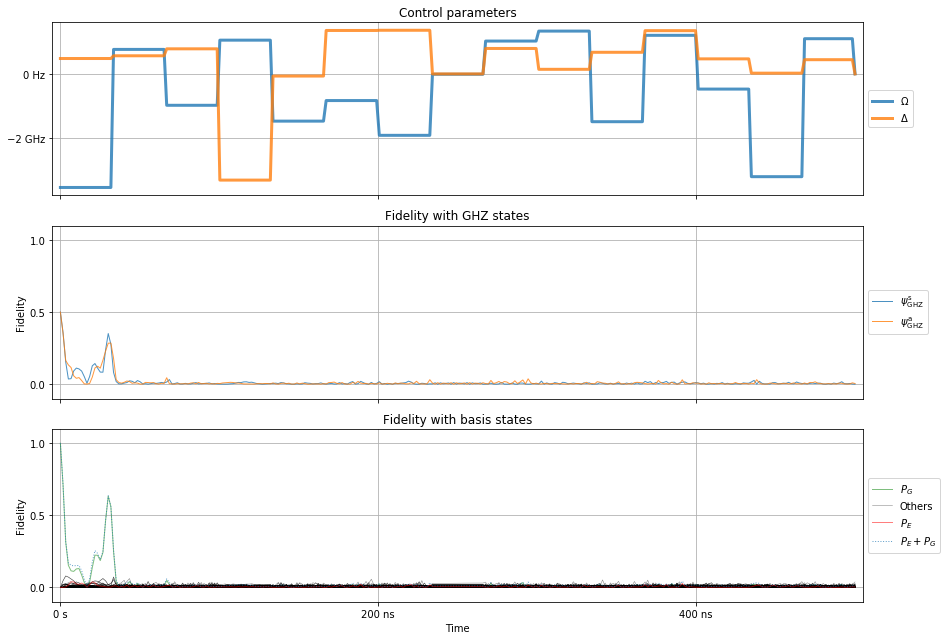

In [7]:
N = 8
t = 0.5e-6
norm_t = t * characteristic_V
optim_result = get_optimised_controls(N, n_ts=15, norm_t=norm_t, norm_V=norm_V, target_state_symmetric=False, 
                                      optim_kwargs={'guess_pulse_type': "RND", 'max_wall_time': 120, 'amp_ubound': 1, 'num_coeffs': 15},
                                      alg="CRAB")
report_stats(optim_result, N, target_state_symmetric=False)
plot_optimresult(optim_result, N, t, C6, characteristic_V, geometry=RegularLattice1D(LATTICE_SPACING))

### RL

timesteps: 8
t: 5e-07
Solved in 4.32s
fidelity with GHZ: 0.8686 (with antisymmetric: 0.1151)
superposition probability: 0.9837 (g: 0.7842, e: 0.1995)



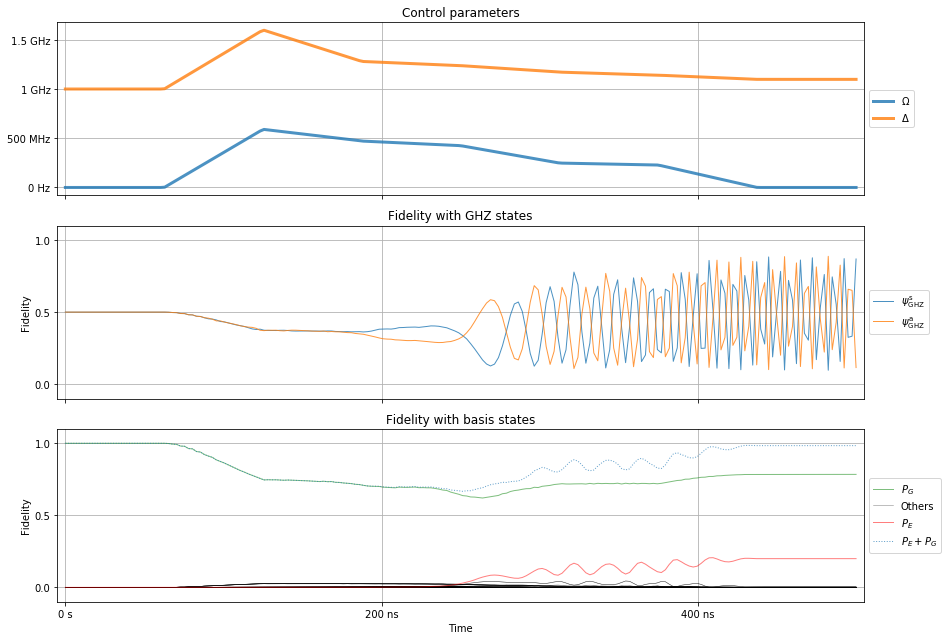

In [7]:
with open("reinforcement_learning/results/20190827_014040.pkl", "rb") as f:
    data = pickle.load(f)
qubit_system_kwargs = data['ti_evolving_qubit_system_kwargs']
assert qubit_system_kwargs['N'] == 8
timesteps = len(data['protocol'].Omega)
print(f'timesteps: {timesteps}')
_t = qubit_system_kwargs['t_list'][-1] * 7
_t_list = np.linspace(0, _t, timesteps + 1) 
print(f't: {_t}')
solve_t_list = np.linspace(0, _t_list[-1], 200)

qubit_system_kwargs.pop('t_list')
e_qs = EvolvingQubitSystem(
    **qubit_system_kwargs,
    Omega=get_hamiltonian_coeff_interpolation(
        _t_list,
        np.hstack((data['protocol'].Omega, data['protocol'].Omega[-1])),
        "linear"
    ),
    Delta=get_hamiltonian_coeff_interpolation(
        _t_list,
        np.hstack((data['protocol'].Delta, data['protocol'].Delta[-1])),
        "linear"
    ),
    t_list=solve_t_list,
)
solve_and_print_stats(e_qs)

In [1]:
from qubit_system.qubit_system_classes import EvolvingQubitSystem as EvolvingQubitSystemQ

with open("reinforcement_learning/results/20190827_161429.pkl", "rb") as f:
    data = pickle.load(f)
qubit_system_kwargs = data['ti_evolving_qubit_system_kwargs']
assert qubit_system_kwargs['N'] == 8
timesteps = len(data['protocol'].Omega)
print(f'timesteps: {timesteps}')

t_list = qubit_system_kwargs['t_list'] 
print(f't: {t_list[-1]}')
solve_t_list = np.linspace(t_list[0], t_list[-1], 200)

qubit_system_kwargs.pop('t_list')
e_qs = EvolvingQubitSystemQ(
    **qubit_system_kwargs,
    Omega=data['protocol'].Omega,
    Delta=data['protocol'].Delta,
    t_list=t_list,
)
solve_and_print_stats(e_qs)

NameError: name 'pickle' is not defined

timesteps: 7
t: 5e-07
Solved in 6.44s
fidelity with GHZ: 0.5612 (with antisymmetric: 0.1779)
superposition probability: 0.7391 (g: 0.6766, e: 0.0625)



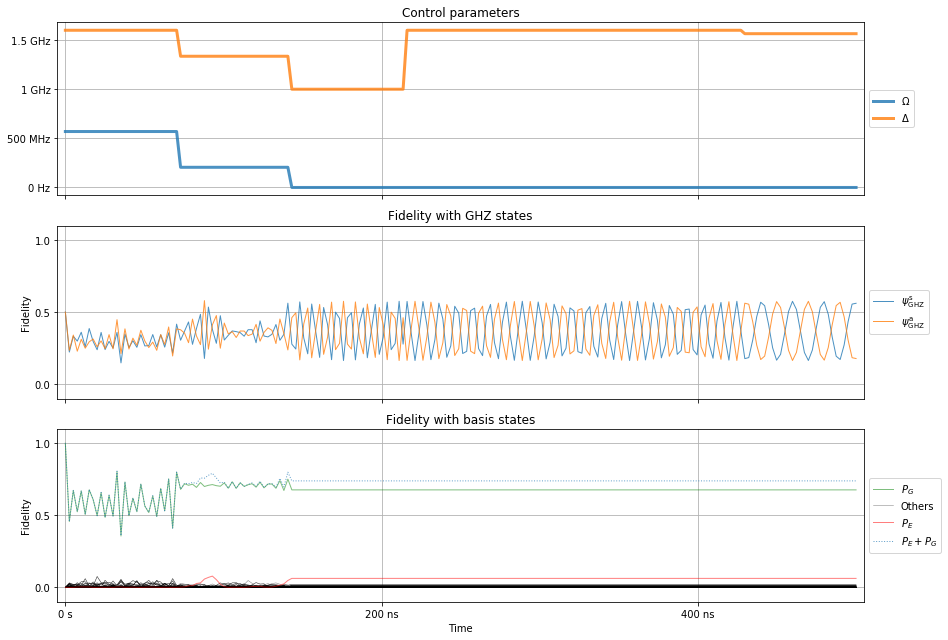

In [10]:
with open("reinforcement_learning/results/20190827_161429.pkl", "rb") as f:
    data = pickle.load(f)
qubit_system_kwargs = data['ti_evolving_qubit_system_kwargs']
assert qubit_system_kwargs['N'] == 8
timesteps = len(data['protocol'].Omega)
print(f'timesteps: {timesteps}')

t_list = qubit_system_kwargs['t_list'] 
print(f't: {t_list[-1]}')
solve_t_list = np.linspace(t_list[0], t_list[-1], 200)

qubit_system_kwargs.pop('t_list')
e_qs = EvolvingQubitSystem(
    **qubit_system_kwargs,
    Omega=get_hamiltonian_coeff_interpolation(
        t_list,
        np.hstack((data['protocol'].Omega, data['protocol'].Omega[-1])),
        # data['protocol'].Omega,
        "previous"
    ),
    Delta=get_hamiltonian_coeff_interpolation(
        t_list,
        np.hstack((data['protocol'].Delta, data['protocol'].Delta[-1])),
        # data['protocol'].Delta,
        "previous"
    ),
    t_list=solve_t_list,
)
solve_and_print_stats(e_qs)


timesteps: 7
t: 5e-07
Solved in 10.34s
fidelity with GHZ: 0.1943 (with antisymmetric: 0.6782)
superposition probability: 0.8725 (g: 0.7277, e: 0.1448)



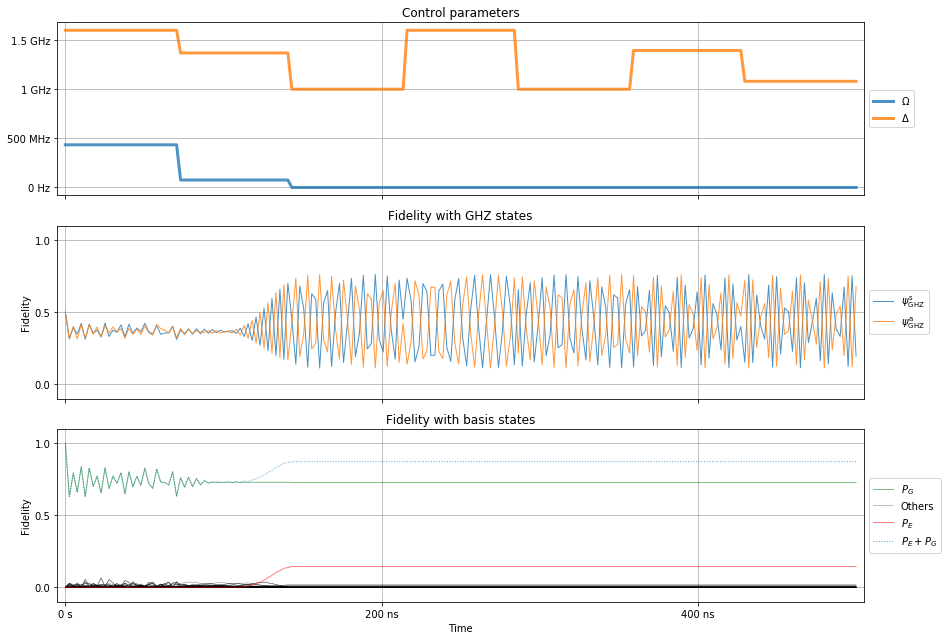

In [67]:
with open("reinforcement_learning/results/20190827_133149.pkl", "rb") as f:
    data = pickle.load(f)
qubit_system_kwargs = data['ti_evolving_qubit_system_kwargs']
assert qubit_system_kwargs['N'] == 8
timesteps = len(data['protocol'].Omega)
print(f'timesteps: {timesteps}')

t_list = qubit_system_kwargs['t_list'] 
print(f't: {t_list[-1]}')
solve_t_list = np.linspace(t_list[0], t_list[-1], 200)

qubit_system_kwargs.pop('t_list')
e_qs = EvolvingQubitSystem(
    **qubit_system_kwargs,
    Omega=get_hamiltonian_coeff_interpolation(
        t_list,
        np.hstack((data['protocol'].Omega, data['protocol'].Omega[-1])),
        # data['protocol'].Omega,
        "previous"
    ),
    Delta=get_hamiltonian_coeff_interpolation(
        t_list,
        np.hstack((data['protocol'].Delta, data['protocol'].Delta[-1])),
        # data['protocol'].Delta,
        "previous"
    ),
    t_list=solve_t_list,
)
solve_and_print_stats(e_qs)



### Krotov

Solved in 7.87s
fidelity with GHZ: 0.0000 (with antisymmetric: 1.0002)
superposition probability: 1.0003 (g: 0.5002, e: 0.5001)



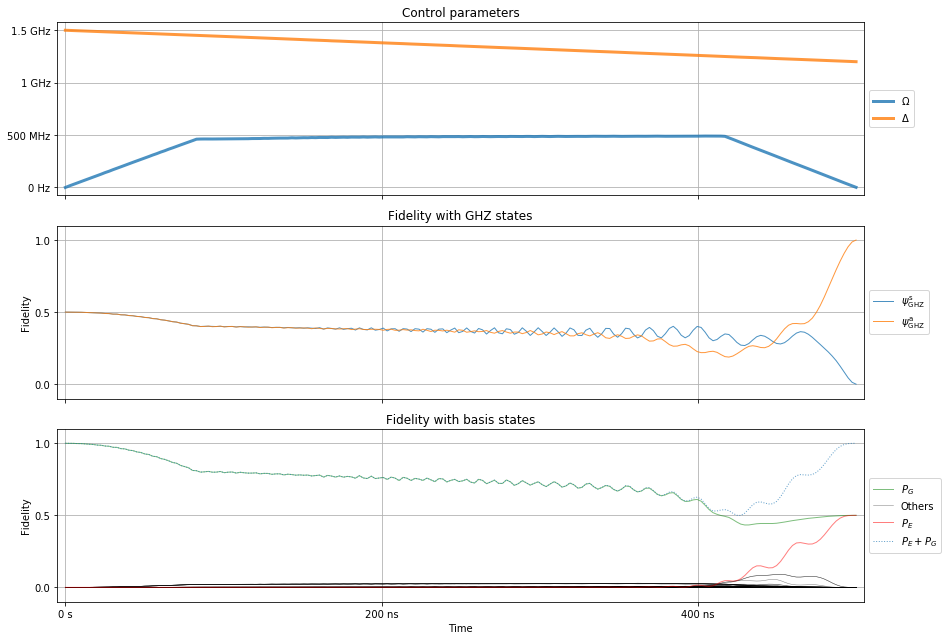

In [12]:
krotov_result = krotov.result.Result.load("demonstration_4_krotov_8")

_Omega = krotov_result.optimized_controls[0] * characteristic_V
_Delta = krotov_result.optimized_controls[1] * characteristic_V
_t_list = np.linspace(0, t, len(_Omega))
e_qs = EvolvingQubitSystem(
    N=N, V=C6, geometry=RegularLattice1D(LATTICE_SPACING),
    Omega=get_hamiltonian_coeff_interpolation(_t_list, _Omega, "cubic"),
    Delta=get_hamiltonian_coeff_interpolation(_t_list, _Delta, "cubic"),
    t_list=np.linspace(0, t, 200),
    ghz_state=StandardGHZState(N)
)
solve_and_print_stats(e_qs)

## 8 qubits, $T = 0.15 \times 10^{-6}$s

Solved in 1.72s
fidelity with GHZ: 0.9352 (with antisymmetric: 0.0064)
superposition probability: 0.9417 (g: 0.4802, e: 0.4615)



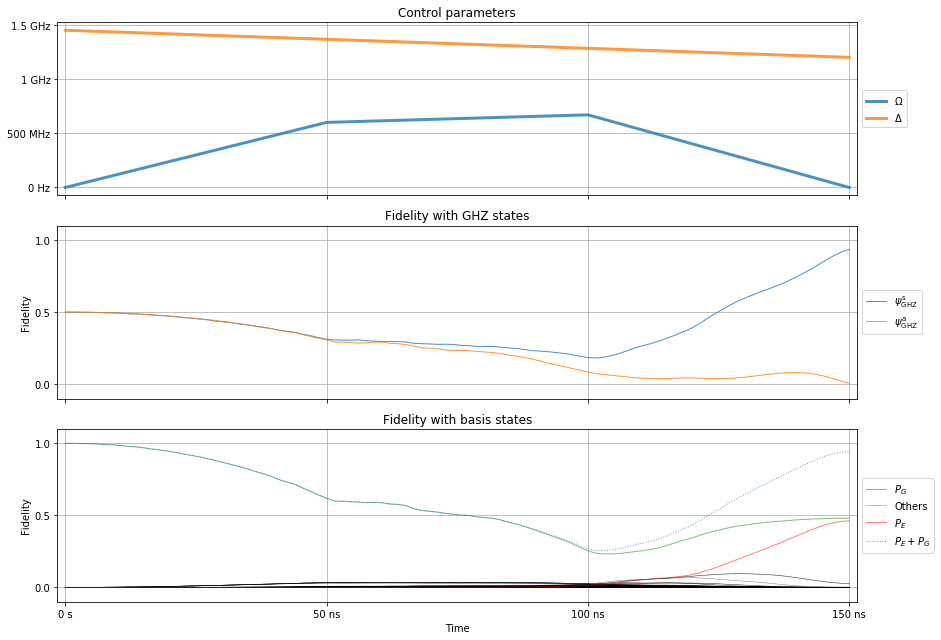

In [44]:
N = 8
t = 0.15e-6
e_qs = EvolvingQubitSystem(
    N=N, V=C6, geometry=RegularLattice1D(spacing=LATTICE_SPACING),
    Omega=get_hamiltonian_coeff_linear_interpolation([0, t / 3, t * 2 / 3, t], [0, 600e6, 670e6, 0]),
    Delta=get_hamiltonian_coeff_linear_interpolation([0, t], [1.45e9, 1.2e9]),
    t_list=np.linspace(0, t, 100),
    ghz_state=StandardGHZState(N)
)
solve_and_print_stats(e_qs)

### Krotov

Solved in 2.65s
fidelity with GHZ: 0.9989 (with antisymmetric: 0.0000)
superposition probability: 0.9990 (g: 0.5056, e: 0.4934)



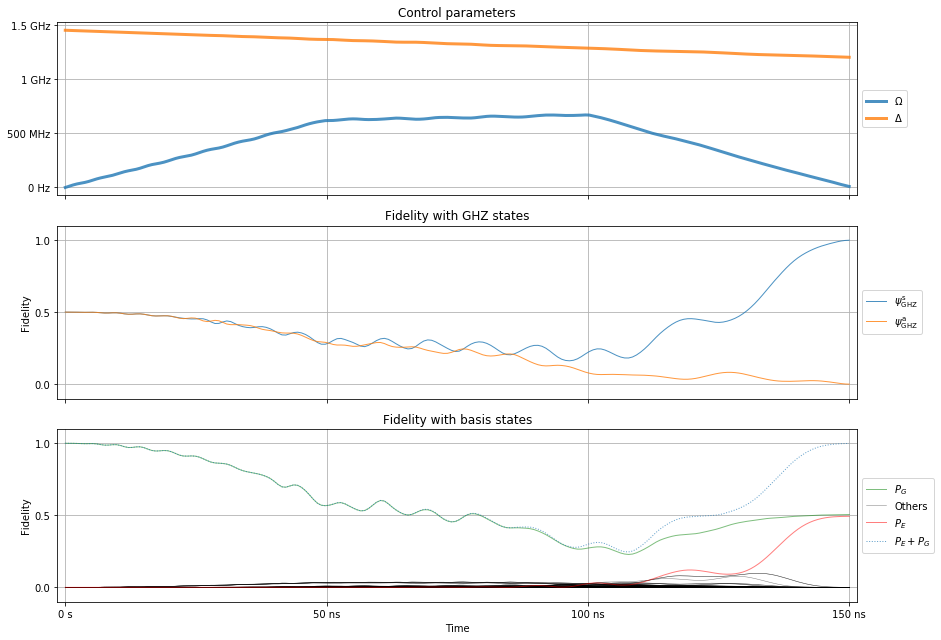

In [46]:
N = 8
t = 0.15e-6

krotov_result = krotov.result.Result.load("demonstration_4_krotov_8_2")

_Omega = krotov_result.optimized_controls[0] * characteristic_V
_Delta = krotov_result.optimized_controls[1] * characteristic_V
_t_list = np.linspace(0, t, len(_Omega))
e_qs = EvolvingQubitSystem(
    N=N, V=C6, geometry=RegularLattice1D(LATTICE_SPACING),
    Omega=get_hamiltonian_coeff_interpolation(_t_list, _Omega, "cubic"),
    Delta=get_hamiltonian_coeff_interpolation(_t_list, _Delta, "cubic"),
    t_list=np.linspace(0, t, 200),
    ghz_state=StandardGHZState(N)
)
solve_and_print_stats(e_qs)

## 8 qubits, $T = 0.05 \times 10^{-6}$s

Solved in 0.44s
fidelity with GHZ: 0.0104 (with antisymmetric: 0.8019)
superposition probability: 0.8123 (g: 0.4611, e: 0.3512)



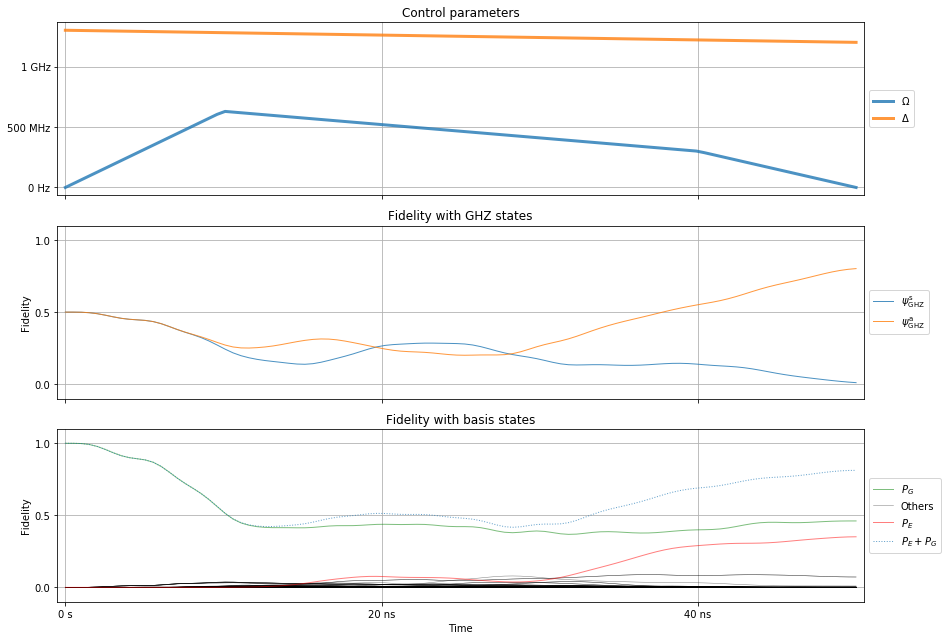

In [62]:
N = 8
t = 0.05e-6
e_qs = EvolvingQubitSystem(
    N=N, V=C6, geometry=RegularLattice1D(spacing=LATTICE_SPACING),
    Omega=get_hamiltonian_coeff_linear_interpolation([0, t / 5, t * 4 / 5, t], [0, 630e6, 300e6, 0]),
    Delta=get_hamiltonian_coeff_linear_interpolation([0, t], [1.3e9, 1.2e9]),
    t_list=np.linspace(0, t, 100),
    ghz_state=StandardGHZState(N)
)
solve_and_print_stats(e_qs)

### Krotov

Solved in 5.74s
fidelity with GHZ: 0.0116 (with antisymmetric: 0.9806)
superposition probability: 0.9922 (g: 0.6025, e: 0.3897)



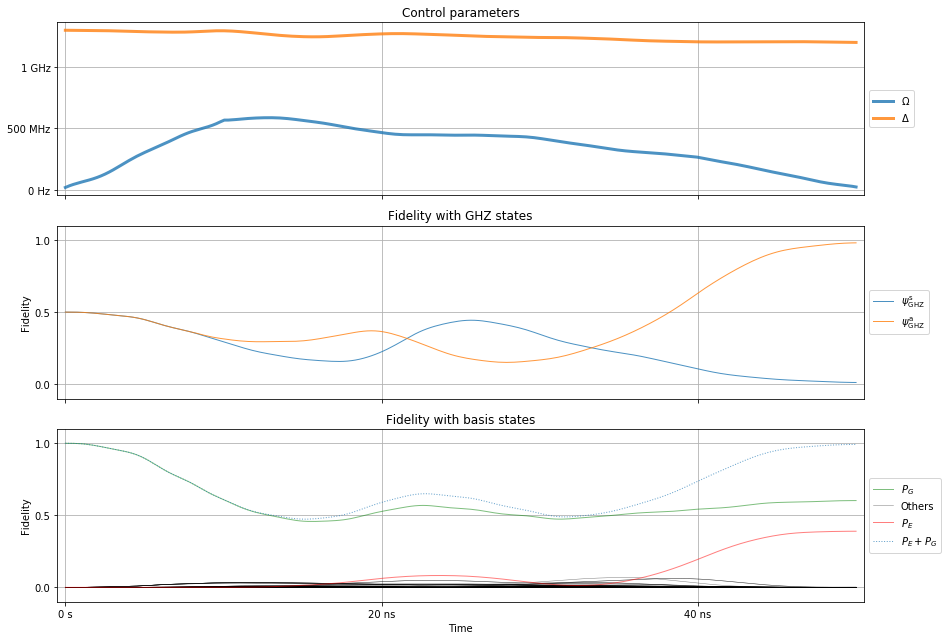

In [9]:
N = 8
t = 0.05e-6

krotov_result = krotov.result.Result.load("demonstration_4_krotov_8_3_1")

_Omega = krotov_result.optimized_controls[0] * characteristic_V
_Delta = krotov_result.optimized_controls[1] * characteristic_V
_t_list = np.linspace(0, t, len(_Omega))
e_qs = EvolvingQubitSystem(
    N=N, V=C6, geometry=RegularLattice1D(LATTICE_SPACING),
    Omega=get_hamiltonian_coeff_interpolation(_t_list, _Omega, "cubic"),
    Delta=get_hamiltonian_coeff_interpolation(_t_list, _Delta, "cubic"),
    t_list=np.linspace(0, t, 200),
    ghz_state=StandardGHZState(N)
)
solve_and_print_stats(e_qs)